Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from keras.layers import Dropout

from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import struct
import cv2
import imageio

IMAGE_HEIGHT = 128 # 320
IMAGE_WIDTH = 128 # 240
size = (IMAGE_HEIGHT, IMAGE_WIDTH)

In [2]:
# Data upload from files to arrays
# The data set is stored under local hard disk in subfolder 'flowers'

main_folder = "flowers/"               # path of the flowers data on current drive/directory (same as code directory)
sub_folders = os.listdir(main_folder)  # List out the sub_directories which are named after folower classes
print(sub_folders)

image_array=[]
class_array=[]
    
for flower_directory in sub_folders:
    for file in os.listdir(os.path.join(main_folder, flower_directory)):
        
        if file.endswith("jpg"):
            image_path= os.path.join(main_folder, flower_directory,  file)
            #image  = cv2.imread(image_path)
            image  = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image1 = cv2.resize(image, size, interpolation = cv2.INTER_AREA)
            image2 = image1.reshape(IMAGE_HEIGHT*IMAGE_WIDTH*1)
            image_array.append(image2)
            class_array.append(flower_directory)   # storing classe of flowers
        else:
            continue


['tulip', 'daisy', 'rose', 'dandelion', 'sunflower']


In [3]:
# Normalizing & enccoding the data.

images = np.array(image_array)   # conversion of list to numpy array of images
images_data = images.astype(float)/255.   # ranginging RGB data between 0-1 and float type.
class_labels = pd.get_dummies(class_array).values.argmax(1)  # encoding flower classes into numeric labels

In [4]:
from sklearn.utils import shuffle
x, y = shuffle(images_data, class_labels)
x = np.array(x)
y = np.array(y)
y.shape

(4323,)

In [5]:
from sklearn.model_selection import train_test_split

# Defines ratios, w.r.t. whole dataset.
ratio_train = 0.6 # 60%
ratio_test  = 0.4 # 40%

# Produces 40% test split.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ratio_test, random_state=42)

In [6]:
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(IMAGE_HEIGHT*IMAGE_WIDTH,)))
#model.add(Dropout(0.5))
#model.add(layers.Dense(10, activation='relu'))
#model.add(Dropout(0.5))
model.add(layers.Dense(5,  activation='softmax'))

In [7]:
from keras import optimizers, regularizers
from keras import losses
from keras import metrics

adam = keras.optimizers.Adam(lr=0.00001)
#adam = keras.optimizers.Adam(learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-08)
sgd = keras.optimizers.SGD(lr=0.001, nesterov=True)
rms = keras.optimizers.RMSprop(lr=0.0001)

model.compile(optimizer = adam, #'rmsprop',
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

In [8]:
history = model.fit(x_train, y_train,
                    epochs=100, batch_size=8,
                    #validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/100
325/325 [==============================] - 7s 20ms/step - loss: 1.6142 - accuracy: 0.2504
Epoch 2/100
325/325 [==============================] - 8s 23ms/step - loss: 1.5488 - accuracy: 0.3015
Epoch 3/100
325/325 [==============================] - 7s 22ms/step - loss: 1.5156 - accuracy: 0.3131
Epoch 4/100
325/325 [==============================] - 6s 17ms/step - loss: 1.4891 - accuracy: 0.3360
Epoch 5/100
325/325 [==============================] - 5s 17ms/step - loss: 1.4623 - accuracy: 0.3575
Epoch 6/100
325/325 [==============================] - 5s 16ms/step - loss: 1.4644 - accuracy: 0.3614
Epoch 7/100
325/325 [==============================] - 5s 16ms/step - loss: 1.4378 - accuracy: 0.3867
Epoch 8/100
325/325 [==============================] - 6s 19ms/step - loss: 1.4326 - accuracy: 0.3769
Epoch 9/100
325/325 [==============================] - 7s 21ms/step - loss: 1.4051 - accuracy: 0.4146
Epoch 10/100
325/325 [==============================] - 6s 17ms/step - loss: 1.396

In [9]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

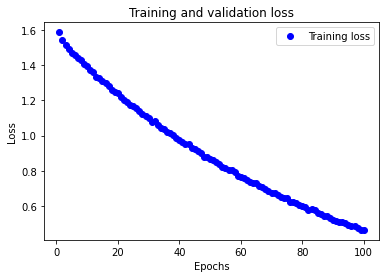

In [10]:
import matplotlib.pyplot as plt
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

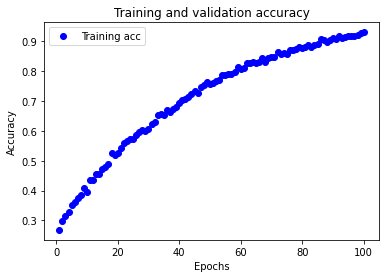

In [11]:
plt.clf()
acc = history.history['accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
# pridcting on test values

test_loss_score, test_accuracy_score = model.evaluate(x_test, y_test)

# display test loss
display(test_loss_score)

# display test predic 
display (test_accuracy_score)

55/55 [==============================] - 1s 13ms/step - loss: 1.7778 - accuracy: 0.3023


1.7778005599975586

0.30231213569641113

In [13]:
# The model Test Loss & accuracy could not match those of the training.
# The convolutional layers are required to bring this overfitting down and that is out of scope of the syllabus till chapter 4. 